## load the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.losses import CategoricalCrossentropy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

directory = r'sign'

# Image data loading
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 42000 files belonging to 35 classes.


## visualize the images

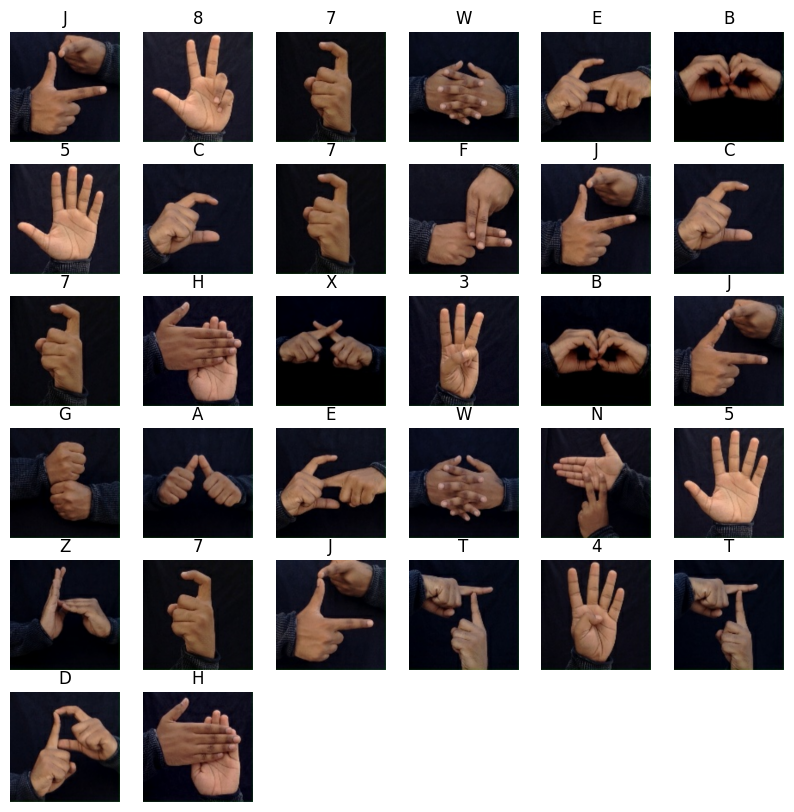

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names

for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Extract the class label from the one-hot encoded array
        class_label_index = int(np.argmax(labels[i]))
        plt.title(class_names[class_label_index])
        
        plt.axis("off")

plt.show()


## convert rgb to grey scale

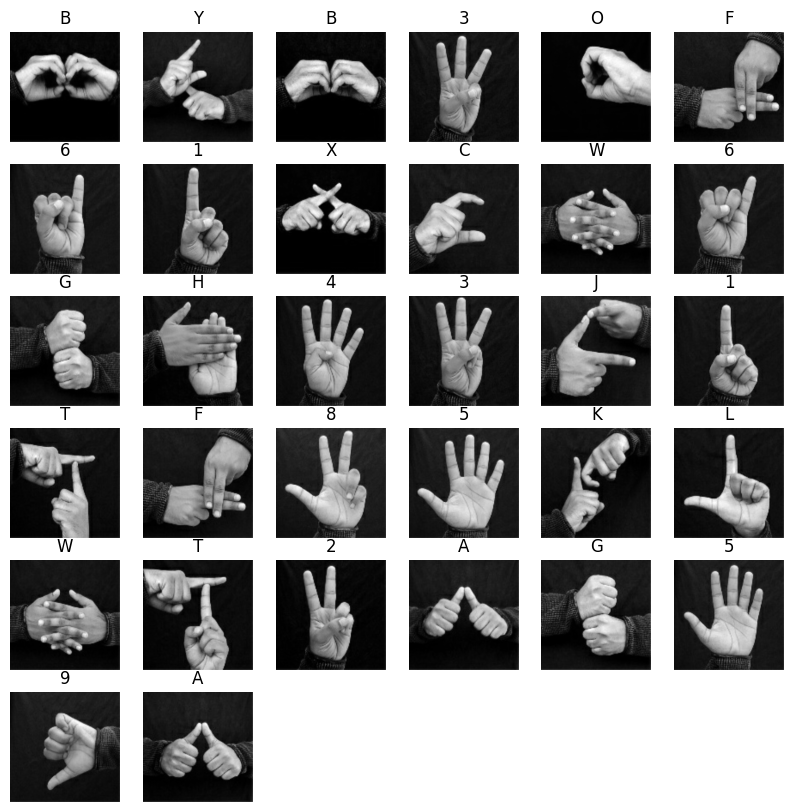

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names

for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        
        # Convert RGB image to grayscale
        grayscale_image = np.dot(images[i].numpy(), [0.2989, 0.5870, 0.1140])
        plt.imshow(grayscale_image, cmap='gray')
        
        # Extract the class label from the one-hot encoded array
        class_label_index = int(np.argmax(labels[i]))
        plt.title(class_names[class_label_index])
        
        plt.axis("off")

plt.show()


## image Augumentation


In [5]:
directory = r'sign'

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    validation_split=0.2,
    fill_mode='nearest'
)


# Train data iterator
train_it = datagen.flow_from_directory(
    directory,
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=100,
    subset='training',
    seed=24
)

# Validation data iterator
val_it = datagen.flow_from_directory(
    directory,
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=100,
    subset='validation',
    seed=24
)



Found 33600 images belonging to 35 classes.
Found 8400 images belonging to 35 classes.


In [6]:
train_it.class_indices


{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 'A': 9,
 'B': 10,
 'C': 11,
 'D': 12,
 'E': 13,
 'F': 14,
 'G': 15,
 'H': 16,
 'I': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

## model artitecture

In [7]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(35, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 35)                1756195   
                                                                 
Total params: 8793699 (33.55 MB)
Trainable params: 1756195 (6.70 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


## model training

In [10]:
# Train the model
history = model.fit(
    train_it,
    validation_data=val_it,
    epochs=3
)

Epoch 1/3
336/336 [==============================] - 2872s 9s/step - loss: 0.0601 - accuracy: 0.9914 - val_loss: 0.0817 - val_accuracy: 0.9929
Epoch 2/3
336/336 [==============================] - 2929s 9s/step - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 3/3
336/336 [==============================] - 3516s 10s/step - loss: 0.0160 - accuracy: 0.9982 - val_loss: 0.0100 - val_accuracy: 0.9988


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


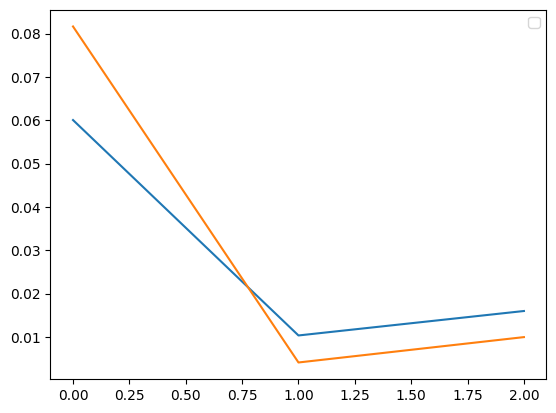

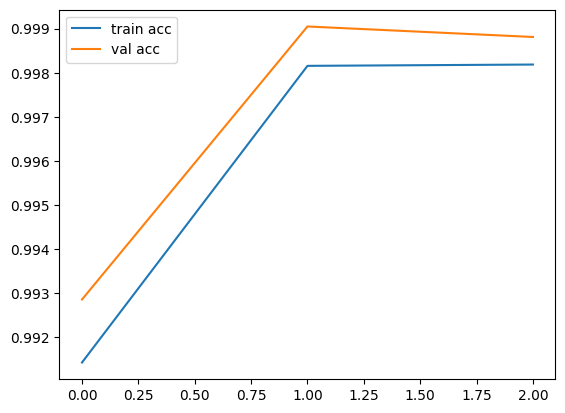

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [12]:
model.evaluate(val_it)


84/84 [==============================] - 516s 6s/step - loss: 0.0070 - accuracy: 0.9987


[0.006975050084292889, 0.9986904859542847]

## model accuracy

In [13]:

# Print the final training and validation accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Final Accuracy: 0.9981845021247864
Final Validation Accuracy: 0.9988095164299011


# Saving Model

In [14]:
model.save('densnet_model.h5')

d:\Codebook\Deep_Learning\fruit\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from tensorflow import keras
model = keras.models.load_model('densnet_model.h5')

# predicted by user input

In [17]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

import numpy as np

# Assuming 'model' is already defined
model = load_model('densnet_model.h5')

# Dictionary mapping class indices to class labels
# class_dict = {
#  0:'bhindi_masala',
#  1:'boondi',
#  2:'chana_masala',
#  3:'chapati',
#  4:'daal_baati_churma',
#  5:'daal_puri',
#  6:'gajar_ka_halwa',
#  7:'gulab_jamun',
#  8:'jalebi',
#  9:'lassi',
#  10:'modak',
#  11:'mysore_pak',
#  12:'palak_paneer',
#  13:'poha',
#  14:"shrikhand"
#  }
image_path = r'sign\E\5.jpg'
image = load_img(image_path, target_size=(224, 224))
img = np.array(image)
img = preprocess_input(img)
img = img.reshape(1, 224, 224, 3)

prediction = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding class label
# predicted_class_label = class_dict[predicted_class_index]

# Print the predicted class label
print(f"The predicted class is: {predicted_class_index}")

1/1 [==============================] - 1s 1s/step
The predicted class is: 13


In [18]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

import numpy as np

# Load the pre-trained model
model = load_model('densnet_model.h5')

# New dictionary mapping class indices to class labels
class_dict = {
 '1': 0,'2': 1,'3': 2,'4': 3,
 '5': 4,
 '6': 5,'7': 6,'8': 7,
 '9': 8,'A': 9,'B': 10,
 'C': 11,
 'D': 12,'E': 13,'F': 14,
 'G': 15,
 'H': 16,'I': 17,'J': 18,
 'K': 19,
 'L': 20,'M': 21,'N': 22,
 'O': 23,
 'P': 24,'Q': 25,'R': 26,'S': 27,
 'T': 28,'U': 29,'V': 30,
 'W': 31,'X': 32,'Y': 33,
 'Z': 34
 }

image_path = r'sign\E\5.jpg'
image = load_img(image_path, target_size=(224, 224))
img = np.array(image)
img = preprocess_input(img)
img = img.reshape(1, 224, 224, 3)

prediction = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding class label from the new class dictionary
predicted_class_label = [k for k, v in class_dict.items() if v == predicted_class_index][0]

# Print the predicted class label
print(f"The predicted class is: {predicted_class_label}")


1/1 [==============================] - 1s 1s/step
The predicted class is: E


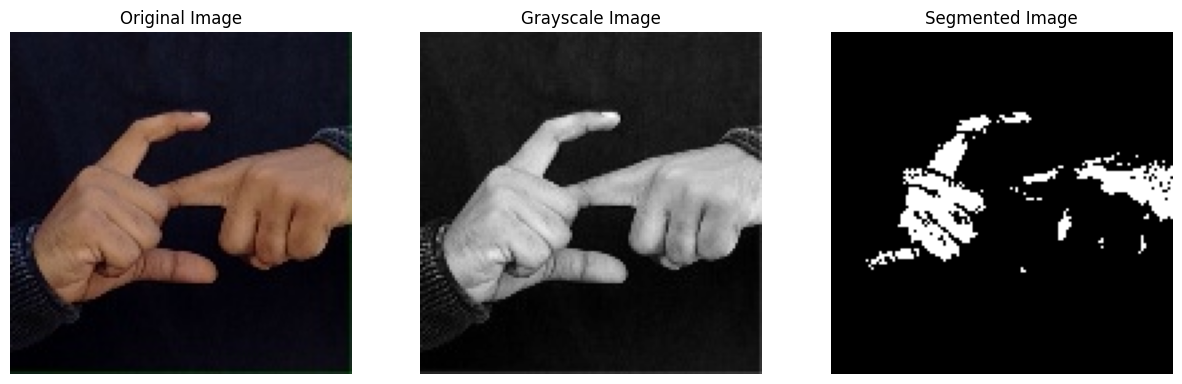

In [19]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = r'sign\E\5.jpg'

image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the original, grayscale, and segmented images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Segmented Image
plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()


In [20]:
train_it.class_indices

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 'A': 9,
 'B': 10,
 'C': 11,
 'D': 12,
 'E': 13,
 'F': 14,
 'G': 15,
 'H': 16,
 'I': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

In [18]:
type(prediction)

numpy.ndarray

In [19]:
print(prediction)

[[1.7451941e-11 2.2821053e-18 1.0000000e+00]]
